## Assignment 2

# 2. Dataset description and Overview
The dataset used for this assignment is a sample from [EMNIST handwritten character dataset - ByClass](https://www.nist.gov/itl/products-and-services/emnist-dataset), a collection of 814,255+ 28 by 28 images with character labels. This smaller sample set can be downloaded from the Google Drive link provided in the assignment specification. The dataset consists of 120000 amount images, of which 100,000 is split into a test set, which was further divided into a validation set after pre-processing, and a testing set of 20,000.

In [ ]:
from google.colab import drive
import numpy as np
import matplotlib.pyplot as plt
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pickle
import os

drive_path = '/content/drive/MyDrive/EMNIST_Byclass_Small2'

train_dict = pickle.load(open(os.path.join(drive_path, 'emnist_train.pkl'), 'rb'))
test_dict = pickle.load(open(os.path.join(drive_path, 'emnist_test.pkl'), 'rb'))

# Extract the images and labels from the dictionaries
train_images = train_dict['data']
train_labels = train_dict['labels']
test_images = test_dict['data']
test_labels = test_dict['labels']
print("Testing images shape:", test_images.shape)
print("Training images shape:", train_images.shape)


Testing images shape: (20000, 28, 28)
Training images shape: (100000, 28, 28)


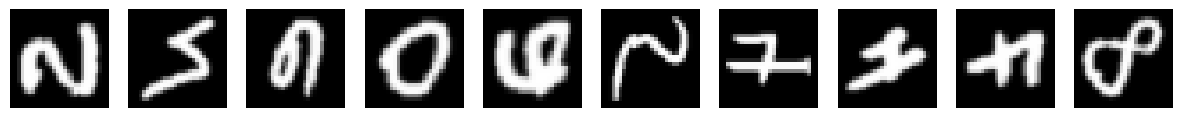

In [ ]:
# Number of images to display
num_images = 10

# Create a figure and axes for the grid
fig, axes = plt.subplots(1, num_images, figsize=(15, 5))

# Iterate through the sample images
for i in range(num_images):
  # Select a random image
  random_index = np.random.randint(0, len(train_images))
  image = train_images[random_index].reshape(28, 28)

  # Display the image
  axes[i].imshow(image, cmap='gray')
  axes[i].axis('off')

plt.show()


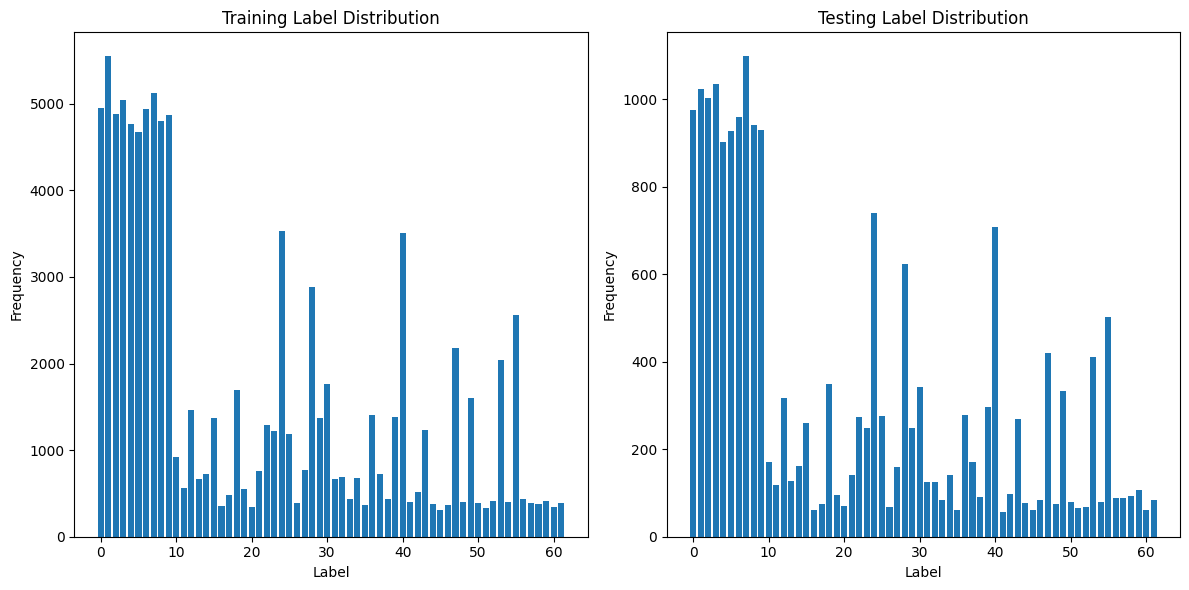

In [ ]:
# Calculate the frequency of each label in the training set
train_label_counts = {}
for label in train_labels:
  if label not in train_label_counts:
    train_label_counts[label] = 0
  train_label_counts[label] += 1

# Calculate the frequency of each label in the testing set
test_label_counts = {}
for label in test_labels:
  if label not in test_label_counts:
    test_label_counts[label] = 0
  test_label_counts[label] += 1


# Plot the histogram of training labels
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.bar(train_label_counts.keys(), train_label_counts.values())
plt.title('Training Label Distribution')
plt.xlabel('Label')
plt.ylabel('Frequency')

# Plot the histogram of testing labels
plt.subplot(1, 2, 2)
plt.bar(test_label_counts.keys(), test_label_counts.values())
plt.title('Testing Label Distribution')
plt.xlabel('Label')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


# 3. Data Preparation

Requred data is provided in a folder that contains a .mat file which is to be loaded in and then XXXX

The folder includes:

Folder details


## 3.1 Loading data

Use the following code to load in the data


In [ ]:
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.utils import class_weight

# Step 1: Normalize the pixel values (0-255) to the range [0, 1]
train_images = train_images.astype('float32') / 255.0
test_images = test_images.astype('float32') / 255.0

# Step 2: Reshape the images for model input
N_train = train_images.shape[0]  # Number of training images
N_test = test_images.shape[0]    # Number of testing images

# Reshape the images to (N, 28, 28, 1)
train_images = train_images.reshape(N_train, 28, 28, 1)
test_images = test_images.reshape(N_test, 28, 28, 1)

# Step 3: Data Augmentation
datagen = ImageDataGenerator(
    rotation_range=10,       # Randomly rotate images by up to 10 degrees
    width_shift_range=0.1,   # Randomly shift images horizontally by up to 10% of width
    height_shift_range=0.1,  # Randomly shift images vertically by up to 10% of height
    zoom_range=0.1           # Randomly zoom into images by up to 10%
)

# Fit the data generator on the training images
datagen.fit(train_images)

# Step 4: Class Rebalancing
# Compute class weights to account for class imbalance
class_weights = class_weight.compute_class_weight('balanced', np.unique(train_labels), train_labels)
class_weights_dict = dict(enumerate(class_weights))

#Remember Below
# model.fit(train_images, train_labels, class_weight=class_weights_dict)

# Step 5 (Optional): Label Smoothing

# Summary of preprocessing steps
print("Train images shape (after reshaping):", train_images.shape)
print("Test images shape (after reshaping):", test_images.shape)
print("Class weights for balancing:", class_weights_dict)

TypeError: too many positional arguments